In [1]:
import pandas as pd
import numpy as np
import pylab as plt

import mysql.connector

mydb = mysql.connector.connect(
  host="172.28.200.50",
  port=3306,
  user="root",
  passwd="insert-password-here",
  database="iiwari_org")


mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData;" );
df = pd.DataFrame(mycursor.fetchall())
df.to_csv('node_data.csv')

# Plot x ja y ja katsotaan suunilleen rajat

7993
-1744
6194
-5191


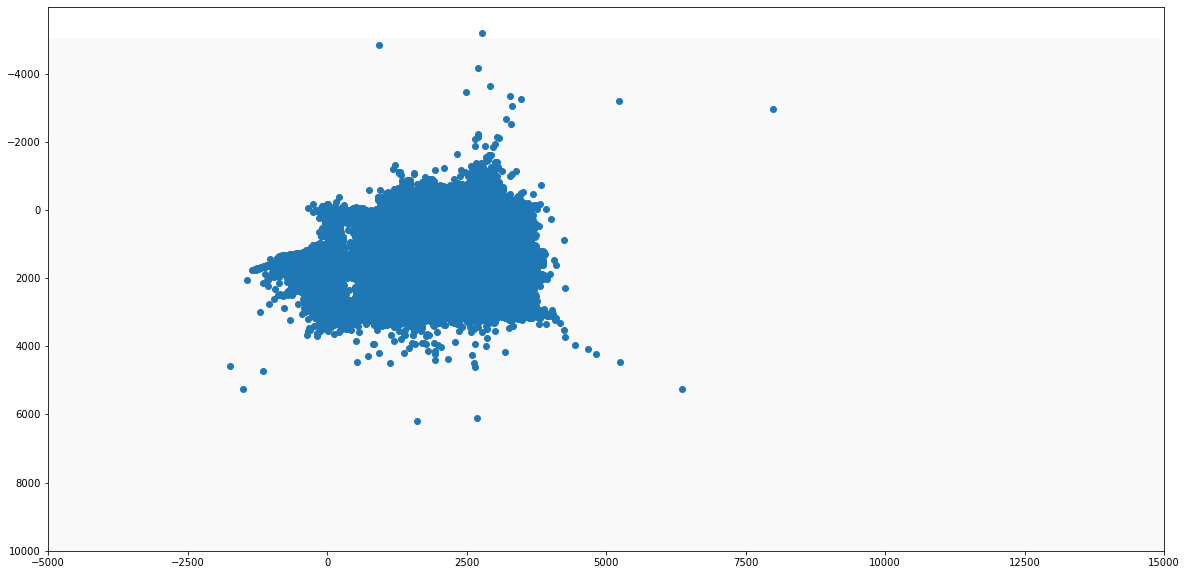

In [100]:
img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-5000,15000,10000,-5000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(df.x, df.y, 'o')

print(df.x.max())
print(df.x.min())
print(df.y.max())
print(df.y.min())

# Muunnettaan node_idt järkeviksi luvuiksi

In [67]:
df['node_id'] = pd.factorize(df['node_id'])[0] + 1
df

,node_id,timestamp,x,y,z,q
0,1,b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,1,b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,1,b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,1,b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...
499995,1,b'2020-10-10 10:53:36.062033+00:00',1787,-178,100,0
499996,1,b'2020-10-10 10:53:42.062113+00:00',1785,-203,100,0
499997,1,b'2020-10-10 10:53:43.06189+00:00',1785,-210,100,0
499998,1,b'2020-10-10 10:53:44.062039+00:00',1779,-219,100,0


# Timestamp round ms

In [69]:
df['timestamp'] = df['timestamp'].astype(str)
df['timestamp'] = df['timestamp'].str.slice(2, -7)
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df.timestamp = df.timestamp.dt.round("ms")

In [70]:
df

,node_id,timestamp,x,y,z,q
0,1,2020-06-24 12:20:08.533,2762,-257,100,0
1,1,2020-06-24 12:20:08.620,2870,-344,100,0
2,1,2020-06-24 12:20:09.623,2916,-344,100,0
3,1,2020-06-24 12:20:09.623,2894,-254,100,0
4,1,2020-06-24 12:20:10.116,2888,-188,100,0
...,...,...,...,...,...,...
499995,1,2020-10-10 10:53:36.062,1787,-178,100,0
499996,1,2020-10-10 10:53:42.062,1785,-203,100,0
499997,1,2020-10-10 10:53:43.062,1785,-210,100,0
499998,1,2020-10-10 10:53:44.062,1779,-219,100,0


# Dublikaattien poisto (Timestamp ja noden mukaan)

In [71]:
dublikated = df[df.duplicated(subset=['node_id', 'timestamp'],keep=False)]
dublikated

,node_id,timestamp,x,y,z,q
2,1,2020-06-24 12:20:09.623,2916,-344,100,0
3,1,2020-06-24 12:20:09.623,2894,-254,100,0
185,1,2020-06-24 12:28:19.493,2923,962,100,0
186,1,2020-06-24 12:28:19.493,2918,970,100,0
312,1,2020-06-25 05:02:44.232,3362,-82,100,0
...,...,...,...,...,...,...
499973,1,2020-10-10 10:51:46.062,1768,493,100,0
499979,1,2020-10-10 10:52:03.062,1738,194,100,0
499980,1,2020-10-10 10:52:03.062,1744,186,100,0
499989,1,2020-10-10 10:53:14.062,1798,-92,100,0


In [72]:
df = df.drop_duplicates(subset=['node_id','timestamp'], keep='first')
df

,node_id,timestamp,x,y,z,q
0,1,2020-06-24 12:20:08.533,2762,-257,100,0
1,1,2020-06-24 12:20:08.620,2870,-344,100,0
2,1,2020-06-24 12:20:09.623,2916,-344,100,0
4,1,2020-06-24 12:20:10.116,2888,-188,100,0
5,1,2020-06-24 12:20:11.086,2910,-200,100,0
...,...,...,...,...,...,...
499995,1,2020-10-10 10:53:36.062,1787,-178,100,0
499996,1,2020-10-10 10:53:42.062,1785,-203,100,0
499997,1,2020-10-10 10:53:43.062,1785,-210,100,0
499998,1,2020-10-10 10:53:44.062,1779,-219,100,0


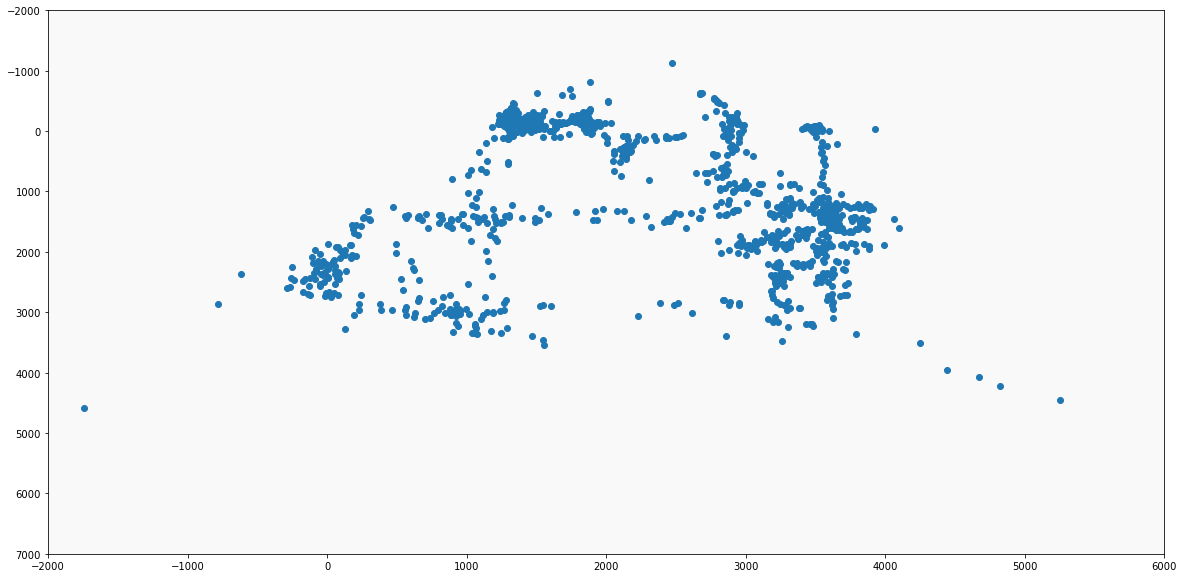

In [74]:
day1 = df.loc[(df['timestamp'].dt.day==26) & (df['timestamp'].dt.month==6) & (df['timestamp'].dt.year==2020)]

img = plt.imread("whitepic.png")
fig, ax = plt.subplots()
ax.imshow(img,extent=(-2000,6000,7000,-2000),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(day1.x, day1.y, 'o')


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


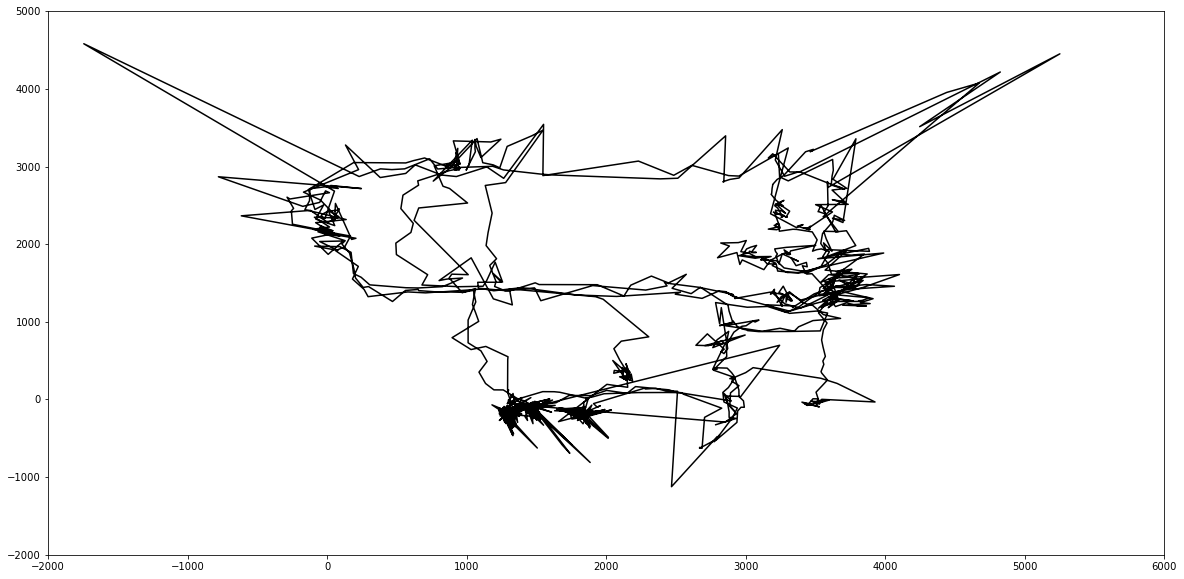

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = day1.x
y = day1.y

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-2000, 6000, -2000, 5000])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('test.gif')


,node_id,timestamp,x,y,z,q
4296,1,2020-06-26 05:06:42.646,2786,-325,100,0
4297,1,2020-06-26 05:06:44.646,2933,-244,100,0
4298,1,2020-06-26 05:06:45.647,2882,-230,100,0
4299,1,2020-06-26 05:06:47.646,2882,-159,100,0
4301,1,2020-06-26 05:06:49.647,2869,-27,100,0
...,...,...,...,...,...,...
7990,1,2020-06-26 17:10:20.645,2898,-19,100,0
7991,1,2020-06-26 17:10:21.646,2845,78,100,0
7993,1,2020-06-26 17:10:22.647,2873,-54,100,0
7994,1,2020-06-26 17:10:23.603,2917,-141,100,0


In [81]:
from sklearn import preprocessing

x = df[['x','y']].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0: 'x', 1: 'y'})

df_normalized

,x,y
0,0.462771,0.433377
1,0.473863,0.425736
2,0.478587,0.425736
3,0.475711,0.439438
4,0.477971,0.438384
...,...,...
434168,0.362637,0.440316
434169,0.362432,0.438120
434170,0.362432,0.437505
434171,0.361816,0.436715


In [108]:



data = pd.DataFrame()
data['x'], data['y'] = df_normalized['x'],df_normalized['y']


from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=400000,random_state=rs, contamination=.01) 
clf.fit(data)
if_scores = clf.decision_function(data)
if_anomalies=clf.predict(data)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=data[if_anomalies==1]

Text(0.5, 1.0, 'Isolation Forests')

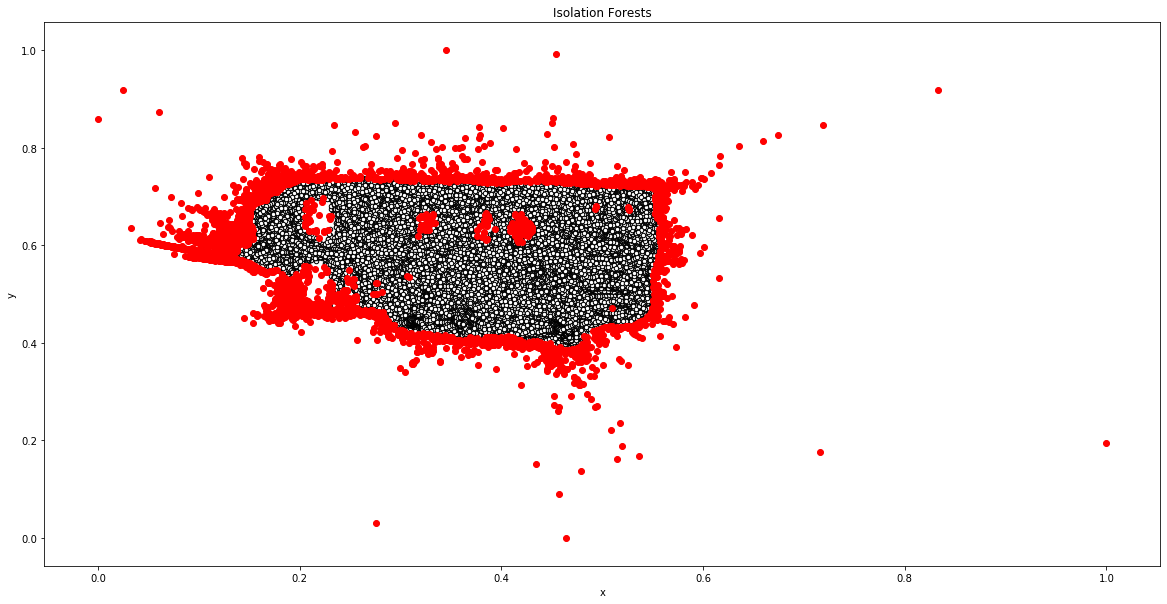

In [109]:
cmap=np.array(['white','red'])
plt.scatter(data.iloc[:,0],data.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Isolation Forests')

In [86]:
df_normalized.shape

(434173, 2)